In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import re 

%matplotlib notebook

#WIKI PSG
#"https://fr.wikipedia.org/wiki/Bilan_saison_par_saison_du_Paris_Saint-Germain"

#Football data base :
#https://www.kaggle.com/hugomathien/soccer

# Read sqlite query results into a pandas DataFrame
con = sqlite3.connect("database.sqlite")
df_country = pd.read_sql_query( "select * from Country", con)
df_league = pd.read_sql_query( "select * from League", con)
df_match = pd.read_sql_query( "select * from Match", con)
df_player = pd.read_sql_query( "select * from Player", con)
df_player_attributes = pd.read_sql_query( "select * from Player_Attributes", con)
df_sqlite_sequence= pd.read_sql_query( "select * from sqlite_sequence", con)
df_team = pd.read_sql_query( "select * from Team", con)
df_team_attributes = pd.read_sql_query( "select * from Team_Attributes", con)

# verify that result of SQL query is stored in the dataframe
#print(df_country.head())
#print(df_league.head())
print(df_match.head())
print(df_player.head())
#print(df_player_attributes.head())
#print(df_sqlite_sequence.head())
print(df_team.head())
print(df_team_attributes.head())

con.close()

   id  country_id  league_id     season  stage                 date  \
0   1           1          1  2008/2009      1  2008-08-17 00:00:00   
1   2           1          1  2008/2009      1  2008-08-16 00:00:00   
2   3           1          1  2008/2009      1  2008-08-16 00:00:00   
3   4           1          1  2008/2009      1  2008-08-17 00:00:00   
4   5           1          1  2008/2009      1  2008-08-16 00:00:00   

   match_api_id  home_team_api_id  away_team_api_id  home_team_goal  ...   \
0        492473              9987              9993               1  ...    
1        492474             10000              9994               0  ...    
2        492475              9984              8635               0  ...    
3        492476              9991              9998               5  ...    
4        492477              7947              9985               1  ...    

    SJA   VCH   VCD   VCA   GBH   GBD   GBA   BSH   BSD   BSA  
0  4.00  1.65  3.40  4.50  1.78  3.25  4.00  1

<IPython.core.display.Javascript object>


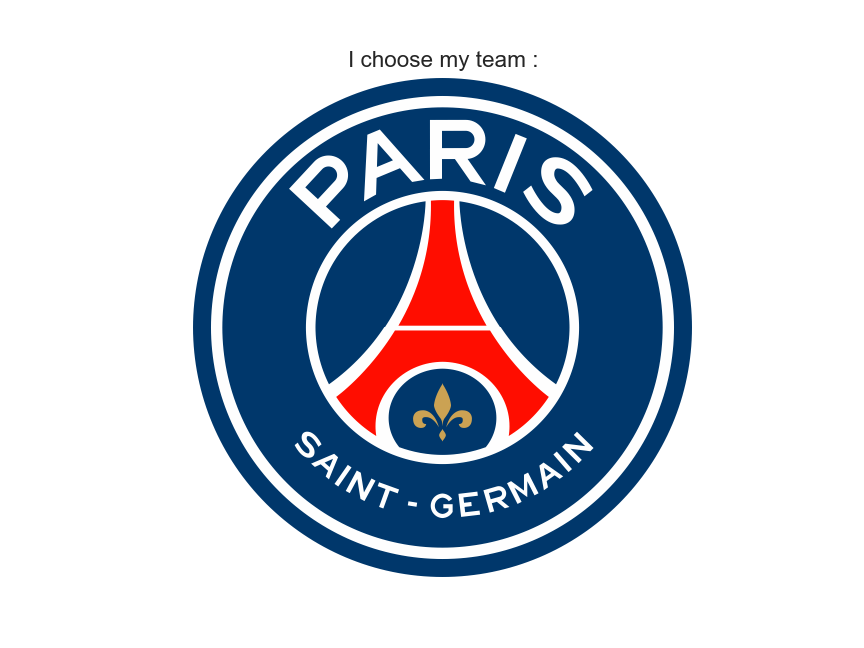

In [9]:
img = mpimg.imread('http://img.xooimage.com/files110/0/8/1/logo-psg-4e0815b.png')
#print(img)
fig = plt.figure()
sns.set_style("whitegrid",  {'axes.grid' : False})
imgplot = plt.imshow(img)
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='off')

plt.title('I choose my team :')
# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.show()

In [3]:
#ID PSG
id_PSG=df_team[df_team["team_short_name"].str.contains("PSG")]["team_api_id"].values

#Column_to_keep
column_to_keep=['id','season','stage','date','match_api_id','home_team_api_id','away_team_api_id','away_team_api_id','home_team_goal','away_team_goal']

#ALL PSG match
PSG_all_match = df_match[(df_match["home_team_api_id"] == int(id_PSG) ) | (df_match["away_team_api_id"] == int(id_PSG) )][column_to_keep]
Number_of_matches=PSG_all_match["id"].value_counts().sum()
#Create result column
PSG_all_match["PSG_goals"] = PSG_all_match['home_team_goal'].where(PSG_all_match["home_team_api_id"] == int(id_PSG), PSG_all_match['away_team_goal'])
PSG_all_match["OPP_goals"] = PSG_all_match['home_team_goal'].where(PSG_all_match["home_team_api_id"] != int(id_PSG), PSG_all_match['away_team_goal'])
PSG_all_match["Home_away"]=PSG_all_match["home_team_api_id"].map(
         lambda X : 'Home' if X  == int(id_PSG) else 'Away' )
PSG_all_match[["home_team_api_id","home_team_goal","away_team_goal","PSG_goals","OPP_goals","Home_away"]].head()


,home_team_api_id,home_team_goal,away_team_goal,PSG_goals,OPP_goals,Home_away
4773,9829,1,0,0,1,Away
4782,8592,2,4,4,2,Away
4794,9847,0,1,0,1,Home
4805,9831,1,0,0,1,Away
4814,9847,1,0,1,0,Home


In [6]:
PSG_all_match["RESULT"]=(PSG_all_match["PSG_goals"] - PSG_all_match["OPP_goals"]).map(
         lambda X : 'Win' if X > 0 else 'Lost' if X < 0 else 'Draw')

#Stats by season
Result_by_seasons=PSG_all_match.groupby('season')["RESULT"].value_counts().to_frame()
Result_by_seasons.head()


RESULT
season    RESULT        
2008/2009 Win         19
          Lost        12
          Draw         7
2009/2010 Lost        15
          Win         12

In [8]:
Mean_goal_by_seasons=PSG_all_match.groupby(['season',"Home_away"])["PSG_goals"].mean().to_frame()
Mean_goal_by_seasons.reset_index().set_index('season').head()

,Home_away,PSG_goals
season,,
2008/2009,Away,1.052632
2008/2009,Home,1.526316
2009/2010,Away,0.947368
2009/2010,Home,1.684211
2010/2011,Away,1.210526


<IPython.core.display.Javascript object>


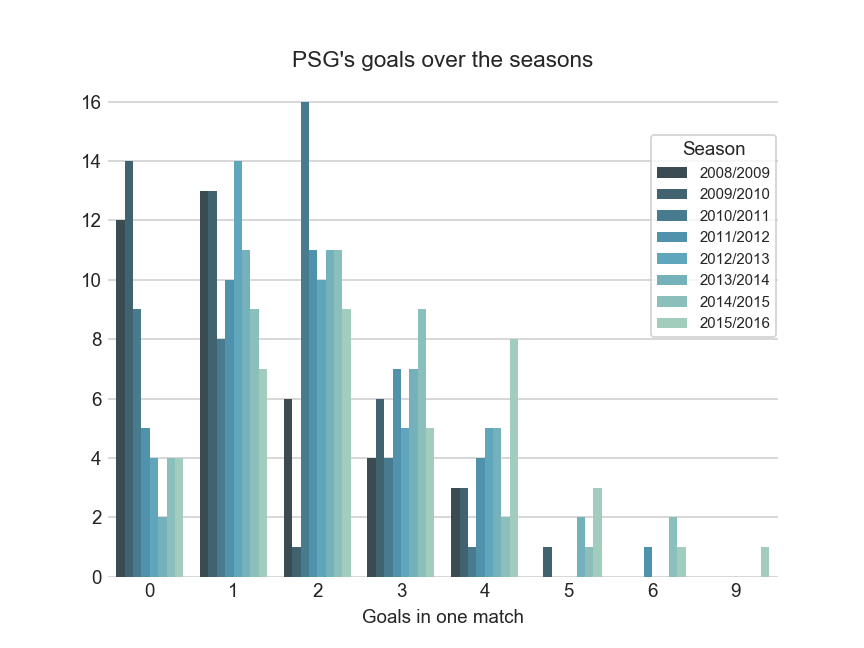

In [10]:
fig = plt.figure()
sns.set_style("whitegrid", {'legend.frameon':True})



sns.countplot(PSG_all_match["PSG_goals"],hue=PSG_all_match["season"], palette="GnBu_d")
              #,ax=ax2)
#Legend
legend=plt.legend(bbox_to_anchor=(.8,0.9), loc=2,fontsize=8)
legend.get_frame().set_facecolor('white')
legend.set_title("Season")

plt.xlabel('Goals in one match')
plt.ylabel('')
plt.title("PSG's goals over the seasons")

#No frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
plt.show()

In [11]:
#Get data from Wiki
Wiki_stats_psg=pd.read_excel('psg_stats.xlsx')

def find_num(x):
    #Cette fonction supprime tous les chiffres
    return re.sub("[^0-9]", "", x)

#Drop the letter
Wiki_stats_psg['Cl']=Wiki_stats_psg['Cl'].apply(find_num).map(int)
#Some have 1à characters
Wiki_stats_psg['Saison']=Wiki_stats_psg.Saison.str[:9]
Wiki_stats_psg['Saison_small']=Wiki_stats_psg.Saison.str[2:4]+'-' + Wiki_stats_psg.Saison.str[7:9]
Wiki_stats_psg.head()

,Saison,Champ,Cl,Pts,J,G,N,P,Bp,Bc,Dif,CdF,CdL,TdC,CE,M. buteur,B,Entraîneur,Aff,Saison_small
0,1970-1971,D2,1,45,30,17,11,2,52,23,29,32e de finale,NaN,NaN,NaN,"Bras, Prost, Rémond",10.0,Phelipon,3 019,70-71
1,1971-1972,D1,16,30,38,10,10,18,51,67,-16,32e de finale,NaN,NaN,NaN,"Bras, Prost",12.0,Phelipon,10 030,71-72
2,1972-1973,D3,2,42,30,17,8,5,67,28,39,32e de finale,NaN,NaN,NaN,André,NaN,Vicot,675,72-73
3,1973-1974,D2,2,57,34,19,6,9,70,42,28,Quarts de finale,NaN,NaN,NaN,Dogliani,14.0,Vicot et Fontaine,4 087,73-74
4,1974-1975,D1,15,37,38,12,12,14,57,65,-8,Demi-finale,NaN,NaN,NaN,M'Pelé,21.0,Vicot et Fontaine,17 167,74-75


<IPython.core.display.Javascript object>


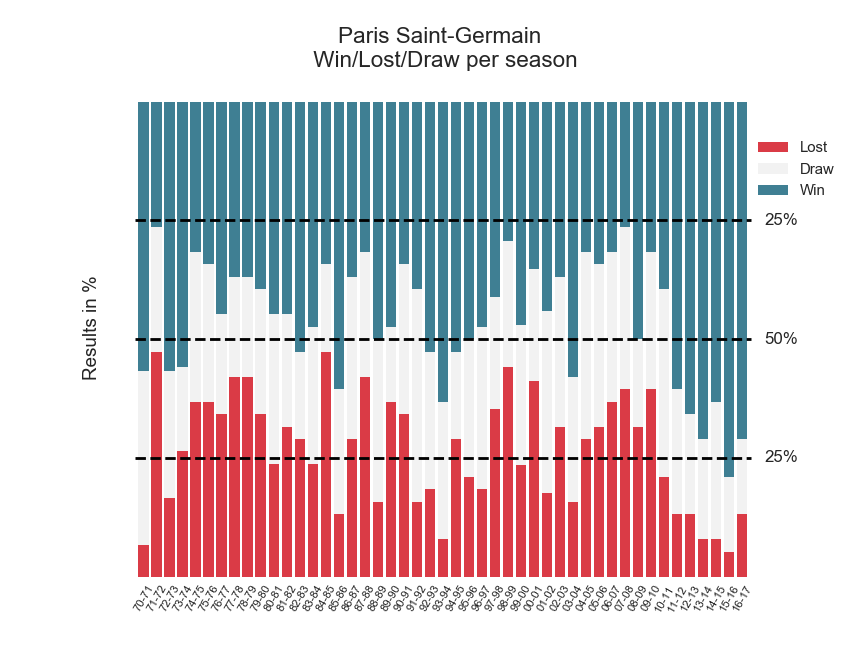

In [12]:

sns.set_style("whitegrid",  {'axes.grid' : False})
colour_choice=sns.diverging_palette(10, 220, sep=80, n=3)


#Multiple plot on the same figure
fig, ax = plt.subplots()
#Wiki_stats_psg['N'].plot(kind='line', marker='s', linestyle='--', color='green',ax=ax1)
plt.bar(Wiki_stats_psg.index,Wiki_stats_psg['P']/Wiki_stats_psg['J'],bottom=None,label='Lost',color=colour_choice[0],tick_label=Wiki_stats_psg['Saison_small'])
plt.bar(Wiki_stats_psg.index,Wiki_stats_psg['N']/Wiki_stats_psg['J'],bottom=Wiki_stats_psg['P']/Wiki_stats_psg['J'],label='Draw' , color=colour_choice[1])
plt.bar(Wiki_stats_psg.index,Wiki_stats_psg['G']/Wiki_stats_psg['J'],bottom=(Wiki_stats_psg['N']+Wiki_stats_psg['P'])/Wiki_stats_psg['J'],label='Win',color=colour_choice[2])


legend=plt.legend(bbox_to_anchor=(0.95,0.9), loc=2,fontsize=8)
legend.get_frame().set_facecolor('white')

plt.axhline(y=0.5, xmin=0.04, xmax=0.96, hold=None,linestyle='--',color='black')
plt.text(49, 0.5, '50%', fontsize=9, va='center', ha='center')
plt.axhline(y=0.25, xmin=0.04, xmax=0.96, hold=None,linestyle='--',color='black')
plt.text(49, 0.25, '25%', fontsize=9, va='center', ha='center')
plt.axhline(y=0.75, xmin=0.04, xmax=0.96, hold=None,linestyle='--',color='black')
plt.text(49, 0.75, '25%', fontsize=9, va='center', ha='center')



plt.xticks(rotation='60',fontsize=6)
ax.set_yticks([])
plt.ylabel('Results in %')
plt.title('Paris Saint-Germain \n Win/Lost/Draw per season')


# remove the frame of the chart
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.show()